In [ ]:
 from google.colab import drive


In [ ]:
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd


import os
import json


file_path = '/content/drive/My Drive/Dissertation/Europe/covid_subs.csv'
# Load the CSV files into DataFrames
covid_df = pd.read_csv(file_path)


ru_war_df = pd.read_csv('/content/drive/My Drive/Dissertation/Europe/russia-ukraine-subs.csv')

In [ ]:
cleaned_df = ru_war_df[ru_war_df['author'] != '[deleted]']

cleaned_df

,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps
0,Porodicnostablo,rt70v0,1.640996e+09,297,europe,t5_2qh4j,Happy New Year from Belgrade,https://i.redd.it/s54eet1ryy881.jpg,10,297,NaN,2022-01-01 00:17:20
1,sir_captaindoge,rt75at,1.640997e+09,13,europe,t5_2qh4j,Happy New Year from Portugal!,https://www.reddit.com/r/europe/comments/rt75a...,1,13,Happy New Year to all countries in Europe! I w...,2022-01-01 00:23:39
2,gsurfer04,rt7az4,1.640997e+09,13,europe,t5_2qh4j,Happy New Year for all Europe!,https://www.reddit.com/r/europe/comments/rt7az...,0,13,"With midnight passing in UTC+0, may 2022 be a ...",2022-01-01 00:32:17
5,BlinkVideoEdits,rt7hjy,1.640998e+09,74,europe,t5_2qh4j,Fireworks across London,https://v.redd.it/wperybwa3z881,2,74,NaN,2022-01-01 00:42:34
6,pgarson,rt7nyz,1.640998e+09,0,europe,t5_2qh4j,Spain says it is first in Europe to officially...,https://www.theguardian.com/world/2021/dec/31/...,37,0,NaN,2022-01-01 00:52:23
...,...,...,...,...,...,...,...,...,...,...,...,...
156759,SpecificBasil7850,18urzq6,1.703976e+09,2291,europe,t5_2qh4j,People's reaction when a foreigner tries speak...,https://i.redd.it/tc4mvwzvfi9c1.png,529,2291,NaN,2023-12-30 22:42:42
156760,uncl3mar1k,18usaj0,1.703977e+09,1,europe,t5_2qh4j,Key Moments of Ukraine War 2023,https://v.redd.it/flrsumd6ii9c1,1,1,NaN,2023-12-30 22:55:18
156761,Resident_Papaya8422,18uskk2,1.703978e+09,1,europe,t5_2qh4j,Hello👋,https://i.redd.it/a865k9idki9c1.jpeg,1,1,NaN,2023-12-30 23:07:21
156762,BeatSmithAI,18ut15x,1.703979e+09,1,europe,t5_2qh4j,History - Roman Firefighters [History Facts],https://www.youtube.com/watch?v=Dcfb5QqKRDU,0,1,NaN,2023-12-30 23:27:29


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

# Assuming cleaned_df is your DataFrame
# Create a combined text column from 'title' and 'selftext'
cleaned_df['text'] = cleaned_df['title'].fillna('') + ' ' + cleaned_df['selftext'].fillna('')

cleaned_df.columns

<ipython-input-6-111f49b66646>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['text'] = cleaned_df['title'].fillna('') + ' ' + cleaned_df['selftext'].fillna('')


Index(['author', 'id', 'created_utc', 'score', 'subreddit', 'subreddit_id',
       'title', 'url', 'num_comments', 'score.1', 'selftext', 'timestamps',
       'text'],
      dtype='object')

In [ ]:
pip install sentence-transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame and it has a column 'text' with subreddit posts

# Debugging step: Print DataFrame structure
print("DataFrame structure:")
print(cleaned_df.head())

# Ensure the DataFrame contains the 'text' column
if 'text' not in cleaned_df.columns:
    raise ValueError("The DataFrame does not contain a 'text' column.")

# Load the pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example dataset of subreddit posts
posts = cleaned_df['text'].tolist()

# Encode the posts into embeddings
print("Encoding posts...")
post_embeddings = model.encode(posts, show_progress_bar=True)



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


DataFrame structure:
            author      id   created_utc  score subreddit subreddit_id  \
0  Porodicnostablo  rt70v0  1.640996e+09    297    europe     t5_2qh4j   
1  sir_captaindoge  rt75at  1.640997e+09     13    europe     t5_2qh4j   
2        gsurfer04  rt7az4  1.640997e+09     13    europe     t5_2qh4j   
5  BlinkVideoEdits  rt7hjy  1.640998e+09     74    europe     t5_2qh4j   
6          pgarson  rt7nyz  1.640998e+09      0    europe     t5_2qh4j   

                                               title  \
0                       Happy New Year from Belgrade   
1                      Happy New Year from Portugal!   
2                     Happy New Year for all Europe!   
5                            Fireworks across London   
6  Spain says it is first in Europe to officially...   

                                                 url  num_comments  score.1  \
0                https://i.redd.it/s54eet1ryy881.jpg            10      297   
1  https://www.reddit.com/r/europe/comm

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding posts...


Batches:   0%|          | 0/3933 [00:00<?, ?it/s]

In [ ]:
# Define a query related to climate change
query = "russia ukraine war"

# Encode the query into an embedding
print("Encoding query...")
query_embedding = model.encode(query)

# Compute cosine similarity between the query embedding and post embeddings
print("Computing similarity scores...")
similarity_scores = cosine_similarity([query_embedding], post_embeddings)[0]

# Define a similarity threshold
threshold = 0.7

# Filter posts based on the similarity threshold
print("Filtering posts...")
filtered_posts = [post for post, score in zip(posts, similarity_scores) if score > threshold]


# Optional: If you want to save the filtered posts to a new DataFrame
filtered_df = cleaned_df.loc[cleaned_df['text'].isin(filtered_posts)]
filtered_df


Encoding query...
Computing similarity scores...
Filtering posts...


,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text
1692,Transeuropeanian,rytffk,1.641623e+09,3231,europe,t5_2qh4j,How Russia’s Military Is Positioned to Threate...,https://i.redd.it/ihvbeb9lrea81.jpg,859,3231,NaN,2022-01-08 06:29:29,How Russia’s Military Is Positioned to Threate...
2504,Korefanz,s18tiu,1.641892e+09,326,europe,t5_2qh4j,"State Dep: Russia Has Invaded, Occupied, Fomen...",https://georgianjournal.ge/politics/37664-stat...,195,326,NaN,2022-01-11 09:11:29,"State Dep: Russia Has Invaded, Occupied, Fomen..."
2762,Ciaran123C,s240rp,1.641987e+09,42,europe,t5_2qh4j,"State Dep: Russia Has Invaded, Occupied, Fomen...",https://georgianjournal.ge/politics/37664-stat...,3,42,NaN,2022-01-12 11:21:42,"State Dep: Russia Has Invaded, Occupied, Fomen..."
4785,Ivan_Matrosoff,s7ya0o,1.642621e+09,1,europe,t5_2qh4j,Why Ukraine is invading Russia?,https://www.reddit.com/r/europe/comments/s7ya0...,0,1,[removed],2022-01-19 19:30:57,Why Ukraine is invading Russia? [removed]
5117,molokoplus359,s8rkav,1.642709e+09,5,europe,t5_2qh4j,Ukraine war necessary if Russia recognises bre...,https://www.reuters.com/world/europe/ukraine-w...,1,5,NaN,2022-01-20 19:59:36,Ukraine war necessary if Russia recognises bre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145947,SpecialistMotor3677,17g47bx,1.698239e+09,1,europe,t5_2qh4j,Russian Invasion of Ukraine during 1⅔ Years: E...,https://youtu.be/T9Mw80xPmY4?si=Sl8YEx8f_oCRx4Jb,0,1,NaN,2023-10-25 13:00:05,Russian Invasion of Ukraine during 1⅔ Years: E...
151974,BalticsFox,1896ldn,1.701532e+09,14,europe,t5_2qh4j,Scientists in Russia struggle in a world trans...,https://www.science.org/content/article/scient...,3,14,NaN,2023-12-02 15:54:45,Scientists in Russia struggle in a world trans...
152165,WitteringLaconic,18a49en,1.701640e+09,1,europe,t5_2qh4j,Ukraine war: Russia accused of killing unarmed...,https://www.bbc.co.uk/news/world-europe-67607857,1,1,NaN,2023-12-03 21:44:34,Ukraine war: Russia accused of killing unarmed...
153245,Grouchy_Letter_6077,18eiqgg,1.702144e+09,1,europe,t5_2qh4j,Ukraine/Russia war,https://i.redd.it/zhed74q43b5c1.jpg,0,1,[removed],2023-12-09 17:41:42,Ukraine/Russia war [removed]


In [ ]:
# Output the filtered posts
print("Filtered posts:")
for post in filtered_posts:
    print(post)


Filtered posts:
How Russia’s Military Is Positioned to Threaten Ukraine 
State Dep: Russia Has Invaded, Occupied, Fomented Conflict Against Ukraine, Georgia, Moldova 
State Dep: Russia Has Invaded, Occupied, Fomented Conflict Against Ukraine, Georgia, Moldova 
Why Ukraine is invading Russia? [removed]
Ukraine war necessary if Russia recognises breakaway regions - pro-Kremlin MP 
Russia's Possible Invasion of Ukraine 
What countries will most likely declare war on Russia once it invades Ukraine? [removed]
Is Russia going to invade Ukraine? [removed]
Ukraine crisis: How many Russian 
How Russia’s Ukraine threat galvanised western alliances 
Russia’s War With Georgia May Be a Blueprint for What’s to Come in Ukraine 
Russia and Ukraine. How did they end up on the verge of a big war [removed]
Ukraine crisis: Russia orders troops into eastern Ukraine 
Russia attacked Ukraine, there are blasts all over my country 
Russia attacks Ukraine: What you need to know 
Currently controlled territories

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get embeddings for a batch of texts
def get_batch_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='pt', truncation=True, padding=True, max_length=512, is_split_into_words=False)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

# Apply batch processing
batch_size = 32  # Adjust batch size based on available memory
embeddings = []
for i in range(0, len(cleaned_df), batch_size):
    batch_texts = cleaned_df['text'][i:i + batch_size].tolist()
    batch_embeddings = get_batch_embeddings(batch_texts)
    embeddings.extend(batch_embeddings)

# Add embeddings to DataFrame
cleaned_df['embedding'] = embeddings


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
#cleaned_df.to_csv('/content/drive/My Drive/Dissertation/embeddings.csv',index=False)
cleaned_df = pd.read_csv('/content/drive/My Drive/Dissertation/embeddings.csv')

In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'saved_tokenizer', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

from sklearn.metrics.pairwise import cosine_similarity
# Initialize tokenizer and model

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
cleaned_df

In [ ]:
#import torch
#from transformers import BertTokenizer, BertModel

# Initialize tokenizer and model tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

import torch
from transformers import BertTokenizer, BertModel

# Initialize tokenizer and model

tokenizer = BertTokenizer.from_pretrained('saved_tokenizer')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get embeddings for a batch of texts
def get_batch_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='pt', truncation=True, padding=True, max_length=512, is_split_into_words=False)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

# Apply batch processing
batch_size = 32  # Adjust batch size based on available memory
embeddings = []
for i in range(0, len(cleaned_df), batch_size):
    batch_texts = cleaned_df['text'][i:i + batch_size].tolist()
    batch_embeddings = get_batch_embeddings(batch_texts)
    embeddings.extend(batch_embeddings)

# Add embeddings to DataFrame
cleaned_df['embedding'] = embeddings


In [ ]:
print(cleaned_df['embedding'].head())


0    [-2.97914833e-01 -1.57870516e-01  5.09887040e-...
1    [ 1.29928604e-01  5.86877838e-02  8.76158535e-...
2    [-3.23944464e-02 -7.45508214e-03  1.08121228e+...
3    [ 1.90415844e-01  1.10303611e-01  5.57507217e-...
4    [-2.32268289e-01 -1.49384394e-01  1.98529154e-...
Name: embedding, dtype: object


In [ ]:
# Function to get embedding for a single text
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

# Define a reference text that represents the desired context
reference_text = "Russia Ukraine war impact"
#reference_text = "climate change impact"

reference_embedding = get_embedding(reference_text).numpy().reshape(1, -1)

# Convert the 'embedding' column to a NumPy array
cleaned_df['embedding'] = cleaned_df['embedding'].apply(np.array)


# Function to calculate cosine similarity
def calculate_similarity(embedding):
    return cosine_similarity(embedding.reshape(1, -1), reference_embedding).flatten()[0]

# Calculate similarity for each post
cleaned_df['similarity'] = cleaned_df['embedding'].apply(lambda emb: calculate_similarity(emb))

when you have the saved tokenizer and embeddings, run this code below.

In [ ]:
import numpy as np

# Ensure that all embeddings are converted to NumPy arrays
def convert_to_array(embedding):
    if isinstance(embedding, str):
        # Remove brackets and split by spaces to handle lists formatted as strings without commas
        embedding = np.array(embedding.strip('[]').split(), dtype=float)
    elif isinstance(embedding, list):
        # Convert list to NumPy array
        embedding = np.array(embedding)
    return embedding

# Apply the conversion to the entire column
cleaned_df['embedding'] = cleaned_df['embedding'].apply(convert_to_array)

# Function to calculate cosine similarity
def calculate_similarity(embedding):
    embedding = embedding.reshape(1, -1)  # Ensure the embedding is in the correct shape
    return cosine_similarity(embedding, reference_embedding).flatten()[0]

# Calculate similarity for each post
cleaned_df['similarity'] = cleaned_df['embedding'].apply(calculate_similarity)


NameError: name 'reference_embedding' is not defined

In [ ]:
import pandas as pd
cleaned_df = pd.read_csv('/content/drive/My Drive/Dissertation/embeddings.csv')


In [ ]:
# Set a similarity threshold to filter relevant posts
similarity_threshold = 0.65
contextually_filtered_df = cleaned_df[cleaned_df['similarity'] >= similarity_threshold]
bert_df= cleaned_df[cleaned_df['similarity'] >= similarity_threshold]
# Display the filtered posts
contextually_filtered_df

,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text,embedding,similarity
263,trolls_brigade,rtuqp9,1.641077e+09,83,europe,t5_2qh4j,Civilians flock to defend Ukraine as Russia te...,https://www.ft.com/content/09eedfc1-d111-40cb-...,17,83,NaN,2022-01-01 22:48:21,Civilians flock to defend Ukraine as Russia te...,[ 6.20466806e-02 1.17018931e-02 2.20141873e-...,0.663754
365,RightwingIsTerror,ru7422,1.641120e+09,0,europe,t5_2qh4j,Russia calls for international investigation i...,https://notesfrompoland.com/2021/12/31/russia-...,11,0,NaN,2022-01-02 10:35:01,Russia calls for international investigation i...,[-2.36783907e-01 -2.21201539e-01 4.92421910e-...,0.686418
456,stillness0072,rumehv,1.641165e+09,129,europe,t5_2qh4j,China calls on Germany to not support Taiwan i...,https://www.aninews.in/news/world/europe/china...,146,129,NaN,2022-01-02 23:18:07,China calls on Germany to not support Taiwan i...,[-1.22672185e-01 2.22984895e-01 -1.60460453e-...,0.656433
473,pgarson,ruvmy6,1.641193e+09,57,europe,t5_2qh4j,Emily in Paris: Ukraine complains over Kyiv ch...,https://www.bbc.com/news/world-europe-59855440,123,57,NaN,2022-01-03 07:02:48,Emily in Paris: Ukraine complains over Kyiv ch...,[-1.85433365e-02 -1.53236121e-01 1.18393727e-...,0.650369
549,inthelu2,rv7g2n,1.641232e+09,1,europe,t5_2qh4j,Joe Biden warns Vladimir Putin of 'heavy sanct...,https://www.sbs.com.au/news/joe-biden-warns-vl...,1,1,NaN,2022-01-03 17:48:11,Joe Biden warns Vladimir Putin of 'heavy sanct...,[-3.08725908e-02 2.62065176e-02 -2.73193493e-...,0.659270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125556,Wagamaga,18tkhnt,1.703847e+09,53,europe,t5_2qh4j,"War in Ukraine: In 2023, Russian disinformatio...",https://observers.france24.com/en/war-in-ukrai...,1,53,NaN,2023-12-29 10:52:07,"War in Ukraine: In 2023, Russian disinformatio...",[ 7.65265599e-02 -3.43301296e-01 -3.29051949e-...,0.670041
125559,UNITED24Media,18tkkdl,1.703847e+09,1,europe,t5_2qh4j,Kyiv in smoke from fires after massive Russian...,https://www.reddit.com/gallery/18tkkdl,0,1,NaN,2023-12-29 10:57:20,Kyiv in smoke from fires after massive Russian...,[-3.02115262e-01 -3.35572451e-01 -2.42849183e-...,0.669262
125736,Iknowwhatyoudoing,18uf5yv,1.703941e+09,1,europe,t5_2qh4j,Ukrainian attack on Russian city Belgorod 29th...,https://i.redd.it/pesfbcf7kf9c1.jpeg,3,1,[removed],2023-12-30 13:01:03,Ukrainian attack on Russian city Belgorod 29th...,[-4.48682010e-01 -1.54387906e-01 1.43109664e-...,0.663665
125767,duckanroll,18uj1o8,1.703953e+09,3053,europe,t5_2qh4j,At least 14 dead and 100 injured in missile st...,https://novayagazeta.eu/articles/2023/12/30/at...,852,3053,NaN,2023-12-30 16:14:08,At least 14 dead and 100 injured in missile st...,[-1.57014653e-01 -9.97787621e-03 3.39200236e-...,0.652857


In [ ]:
# Set a similarity threshold to filter relevant posts
similarity_threshold = 0.65
contextually_filtered_df = cleaned_df[cleaned_df['similarity'] >= similarity_threshold]
bert_df = cleaned_df[cleaned_df['similarity'] >= similarity_threshold]

# Sort the filtered posts by similarity in descending order
contextually_filtered_df_sorted = contextually_filtered_df.sort_values(by='similarity', ascending=False)

# Display the sorted posts
contextually_filtered_df_sorted
#contextually_filtered_df.to_csv('/content/drive/My Drive/Dissertation/embeddings.csv',index=False)

,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text,embedding,similarity
50561,Anony_mouse202,xji9ff,1.663703e+09,1,europe,t5_2qh4j,Ukraine war: Occupied areas call urgent vote t...,https://www.bbc.co.uk/news/world-europe-62965998,0,1,NaN,2022-09-20 19:35:38,Ukraine war: Occupied areas call urgent vote t...,"[-0.147592232, -0.127561271, -0.021444926, -0....",0.780861
3807,3BM15,s8rlqp,1.642709e+09,17,europe,t5_2qh4j,Russia Ukraine Invasion Threat Has Soldiers Pr...,https://www.buzzfeednews.com/article/christoph...,2,17,NaN,2022-01-20 20:01:10,Russia Ukraine Invasion Threat Has Soldiers Pr...,"[-0.158135906, 0.0928491279, 0.225768745, -0.1...",0.771826
22376,BulbulatorPrzyczlap,uciwr1,1.650997e+09,48,europe,t5_2qh4j,Russia accused of shelling Mariupol humanitari...,https://www.theguardian.com/world/2022/apr/26/...,5,48,NaN,2022-04-26 18:13:31,Russia accused of shelling Mariupol humanitari...,"[-0.189049065, -0.0994725525, -0.00805463269, ...",0.771561
22234,Globalfinancidigest,ubtank,1.650915e+09,1,europe,t5_2qh4j,"Russia has lost 15,000 troops in Ukraine war",https://globalfinancialdigest.com/russia-has-l...,0,1,NaN,2022-04-25 19:30:46,"Russia has lost 15,000 troops in Ukraine war","[-0.285478383, -0.0580058694, -0.198585272, 0....",0.764648
37616,Particular-Ad3838,wkatl7,1.660070e+09,1,europe,t5_2qh4j,Ukraine war: Blasts rock Russian airbase in an...,https://www.bbc.co.uk/news/world-europe-62482425,1,1,NaN,2022-08-09 18:29:51,Ukraine war: Blasts rock Russian airbase in an...,"[-0.033978045, 0.14162764, -0.113101348, -0.12...",0.760878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55225,npaular,y8op2f,1.666241e+09,1,europe,t5_2qh4j,Putin Escalates War With Martial Law As He Fac...,https://tnewsline.com/2022/10/19/world/putin-e...,0,1,NaN,2022-10-20 04:50:20,Putin Escalates War With Martial Law As He Fac...,"[-0.185505956, -0.0426450856, 0.198117748, 0.0...",0.650030
14363,Intrepid-Sympathy964,t54gqr,1.646240e+09,1,europe,t5_2qh4j,What do Russians think of Putin's invasion of ...,https://www.euronews.com/2022/03/02/what-do-ru...,0,1,NaN,2022-03-02 16:53:01,What do Russians think of Putin's invasion of ...,"[0.146697655, 0.00246815966, -0.169943318, -0....",0.650019
26077,Nuggetioo,uvmif2,1.653260e+09,1,europe,t5_2qh4j,Since this sub is about Europe but actually Uk...,https://i.redd.it/lfdsee9oy3191.jpg,1,1,NaN,2022-05-22 23:01:13,Since this sub is about Europe but actually Uk...,"[0.0614034124, -0.419751346, 0.0545137972, 0.0...",0.650014
96273,Murky_Perception_605,152pipj,1.689659e+09,1,europe,t5_2qh4j,Ukraine’s Zelenskky says Russia blackmails wor...,https://www.aljazeera.com/news/2023/7/18/ukrai...,0,1,NaN,2023-07-18 05:38:44,Ukraine’s Zelenskky says Russia blackmails wor...,"[0.10824617, -0.0539315715, -0.0170663688, 0.1...",0.650011


In [ ]:
#contextually_filtered_df_sorted = contextually_filtered_df_sorted.drop(columns=['embedding'])
contextually_filtered_df_sorted.to_csv('/content/drive/My Drive/Dissertation/Europe/ru-final.csv',index=False)

In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
bert_df.columns

Index(['author', 'id', 'created_utc', 'score', 'subreddit', 'subreddit_id',
       'title', 'url', 'num_comments', 'score.1', 'selftext', 'timestamps',
       'text', 'embedding', 'similarity'],
      dtype='object')

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']  # Compound score gives overall sentiment
# Apply VADER sentiment analysis
contextually_filtered_df['sentiment'] = contextually_filtered_df['text'].apply(analyze_sentiment)

# Define sentiment labels based on compound scores
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

contextually_filtered_df['sentiment_label'] = contextually_filtered_df['sentiment'].apply(get_sentiment_label)

# Save the DataFrame with sentiment analysis results to a new file
#filtered_df.to_csv('filtered_posts_with_vader_sentiment.csv', index=False)

contextually_filtered_df

<ipython-input-62-eaad06f70c55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contextually_filtered_df['sentiment'] = contextually_filtered_df['text'].apply(analyze_sentiment)
<ipython-input-62-eaad06f70c55>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contextually_filtered_df['sentiment_label'] = contextually_filtered_df['sentiment'].apply(get_sentiment_label)


,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text,embedding,similarity,sentiment,sentiment_label
263,trolls_brigade,rtuqp9,1.641077e+09,83,europe,t5_2qh4j,Civilians flock to defend Ukraine as Russia te...,https://www.ft.com/content/09eedfc1-d111-40cb-...,17,83,NaN,2022-01-01 22:48:21,Civilians flock to defend Ukraine as Russia te...,"[0.0620466806, 0.0117018931, 0.220141873, 0.04...",0.663754,-0.4019,Negative
365,RightwingIsTerror,ru7422,1.641120e+09,0,europe,t5_2qh4j,Russia calls for international investigation i...,https://notesfrompoland.com/2021/12/31/russia-...,11,0,NaN,2022-01-02 10:35:01,Russia calls for international investigation i...,"[-0.236783907, -0.221201539, 0.049242191, 0.01...",0.686418,0.0000,Neutral
456,stillness0072,rumehv,1.641165e+09,129,europe,t5_2qh4j,China calls on Germany to not support Taiwan i...,https://www.aninews.in/news/world/europe/china...,146,129,NaN,2022-01-02 23:18:07,China calls on Germany to not support Taiwan i...,"[-0.122672185, 0.222984895, -0.0160460453, 0.2...",0.656433,-0.3089,Negative
473,pgarson,ruvmy6,1.641193e+09,57,europe,t5_2qh4j,Emily in Paris: Ukraine complains over Kyiv ch...,https://www.bbc.com/news/world-europe-59855440,123,57,NaN,2022-01-03 07:02:48,Emily in Paris: Ukraine complains over Kyiv ch...,"[-0.0185433365, -0.153236121, 0.118393727, -0....",0.650369,-0.5994,Negative
549,inthelu2,rv7g2n,1.641232e+09,1,europe,t5_2qh4j,Joe Biden warns Vladimir Putin of 'heavy sanct...,https://www.sbs.com.au/news/joe-biden-warns-vl...,1,1,NaN,2022-01-03 17:48:11,Joe Biden warns Vladimir Putin of 'heavy sanct...,"[-0.0308725908, 0.0262065176, -0.0273193493, -...",0.659270,-0.1027,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125556,Wagamaga,18tkhnt,1.703847e+09,53,europe,t5_2qh4j,"War in Ukraine: In 2023, Russian disinformatio...",https://observers.france24.com/en/war-in-ukrai...,1,53,NaN,2023-12-29 10:52:07,"War in Ukraine: In 2023, Russian disinformatio...","[0.0765265599, -0.343301296, -0.0329051949, 0....",0.670041,-0.6597,Negative
125559,UNITED24Media,18tkkdl,1.703847e+09,1,europe,t5_2qh4j,Kyiv in smoke from fires after massive Russian...,https://www.reddit.com/gallery/18tkkdl,0,1,NaN,2023-12-29 10:57:20,Kyiv in smoke from fires after massive Russian...,"[-0.302115262, -0.335572451, -0.00242849183, 0...",0.669261,-0.4767,Negative
125736,Iknowwhatyoudoing,18uf5yv,1.703941e+09,1,europe,t5_2qh4j,Ukrainian attack on Russian city Belgorod 29th...,https://i.redd.it/pesfbcf7kf9c1.jpeg,3,1,[removed],2023-12-30 13:01:03,Ukrainian attack on Russian city Belgorod 29th...,"[-0.44868201, -0.154387906, 0.143109664, -0.05...",0.663665,-0.4767,Negative
125767,duckanroll,18uj1o8,1.703953e+09,3053,europe,t5_2qh4j,At least 14 dead and 100 injured in missile st...,https://novayagazeta.eu/articles/2023/12/30/at...,852,3053,NaN,2023-12-30 16:14:08,At least 14 dead and 100 injured in missile st...,"[-0.157014653, -0.00997787621, 0.0339200236, 0...",0.652857,-0.8176,Negative


In [ ]:
!pip install matplotlib seaborn


Top 10 Most Negative Posts:
             id                                               text  sentiment  \
108858  16rmtcx  Azerbaijan conducts information terror against...    -0.9652   
83582   12je399  Head cut off with a knife: Russian soldiers br...    -0.9595   
121321  18a49en  Ukraine war: Russia accused of killing unarmed...    -0.9565   
33915    vzyhgs  'You cannot call them soldiers or an army. The...    -0.9559   
31033    vley01  RT Exposes Bucha Killings &amp; 'Botsman Boys'...    -0.9512   
16184    tbvnd9  Surrogacy in crisis as Ukraine war leaves newb...    -0.9442   
82188   12agxbm  Russia blames Ukraine, arrests suspect in war ...    -0.9442   
119183  17yssuv  Russia frees killers from prison to go to war ...    -0.9432   
99947   15lbato  15 Years Since Russo-Georgian War, 412 Dead an...    -0.9413   
122600  18fkz1p  US files war crime charges against Russians ac...    -0.9403   

        num_comments  similarity  
108858             1    0.660258  
83582     

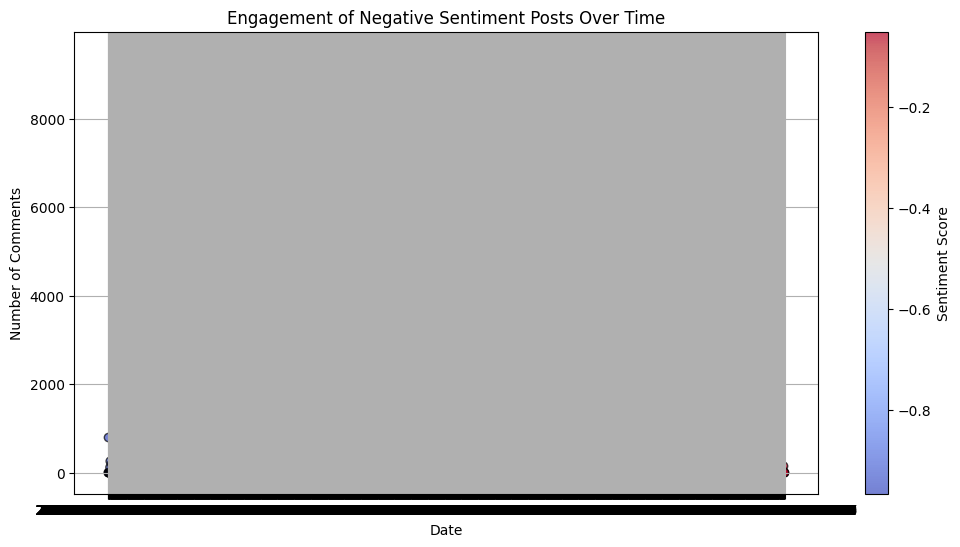

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'contextually_filtered_df' has columns: 'text', 'sentiment', 'num_comments', 'created_utc'

# Convert 'created_utc' to datetime if not already done
#contextually_filtered_df['created_utc'] = pd.to_datetime(contextually_filtered_df['created_utc'], unit='s')

# Filter for negative sentiment posts
negative_posts = contextually_filtered_df[contextually_filtered_df['sentiment'] <= -0.05]

# Sort the negative posts by sentiment to get the most negative ones
most_negative_posts = negative_posts.sort_values(by='sentiment')

# Sort the negative posts by number of comments to get the highest engagement
most_engaged_negative_posts = negative_posts.sort_values(by='num_comments', ascending=False)

# Print the top 10 most negative posts
print("Top 10 Most Negative Posts:")
print(most_negative_posts[['id','text', 'sentiment', 'num_comments','similarity']].head(10))

# Print the top 10 most engaged negative posts
print("Top 10 Most Engaged Negative Posts:")
print(most_engaged_negative_posts[['id','text', 'sentiment', 'num_comments','similarity']].head(10))

# Optionally, you can plot the engagement of the most negative posts
plt.figure(figsize=(12, 6))
plt.scatter(most_negative_posts['timestamps'], most_negative_posts['num_comments'], c=most_negative_posts['sentiment'], cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Engagement of Negative Sentiment Posts Over Time')
plt.grid(True)
plt.show()


Top 10 Most Positive Posts:
             id                                               text  sentiment  \
3616     s81w0m  Ukraine Needs Help Surviving Airstrikes, Not J...     0.8134   
24503    unzbwc  Once Best Friends, Bulgaria Takes a Stand Agai...     0.8074   
51274    xmnwfw  NATO promises more help for Ukraine in respons...     0.8070   
52336    xs1vil  Georgia, Azerbaijan, Ukraine and Moldova agree...     0.7845   
76847   11exp12  Finnish Soldier: Ukraine needs better training...     0.7717   
110174  16xnlgx  "Peace to your home" a concert in Moscow dedic...     0.7579   
100841  15pw99u  Russian Orthodox priests face persecution from...     0.7506   
23908    ukxv68  US intelligence told to keep quiet over role i...     0.7269   
115258  17ga2ct  Bulgaria tops global rule of law progress, Gre...     0.7269   
22379    ucj7k3  Russia hopes for peaceful settlement with Ukra...     0.7184   

        num_comments  similarity  
3616             103    0.695130  
24503     

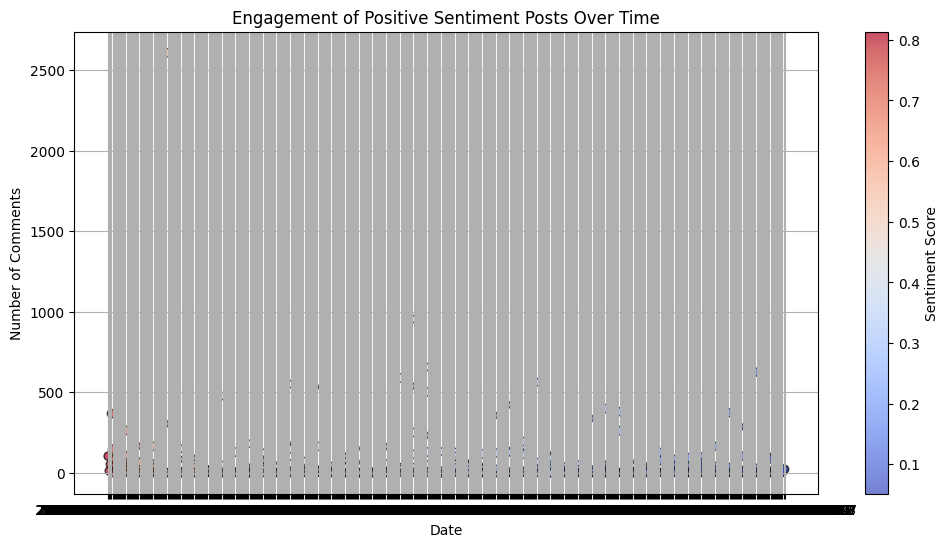

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'contextually_filtered_df' has columns: 'text', 'sentiment', 'num_comments', 'created_utc'

# Convert 'created_utc' to datetime if not already done
#contextually_filtered_df['created_utc'] = pd.to_datetime(contextually_filtered_df['created_utc'], unit='s')

# Filter for positive sentiment posts
positive_posts = contextually_filtered_df[contextually_filtered_df['sentiment'] >= 0.05]

# Sort the positive posts by sentiment to get the most positive ones
most_positive_posts = positive_posts.sort_values(by='sentiment', ascending=False)

# Sort the positive posts by number of comments to get the highest engagement
most_engaged_positive_posts = positive_posts.sort_values(by='num_comments', ascending=False)

# Print the top 10 most positive posts
print("Top 10 Most Positive Posts:")
print(most_positive_posts[['id', 'text', 'sentiment', 'num_comments', 'similarity']].head(10))

# Print the top 10 most engaged positive posts
print("Top 10 Most Engaged Positive Posts:")
print(most_engaged_positive_posts[['id', 'text', 'sentiment', 'num_comments', 'similarity']].head(10))

# Plot the engagement of the most positive posts
plt.figure(figsize=(12, 6))
plt.scatter(most_positive_posts['timestamps'], most_positive_posts['num_comments'], c=most_positive_posts['sentiment'], cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(label='Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Engagement of Positive Sentiment Posts Over Time')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
contextually_filtered_df

,author,id,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text,embedding,similarity,sentiment,sentiment_label
created_utc,,,,,,,,,,,,,,,,
2022-01-01 22:48:21,trolls_brigade,rtuqp9,83,europe,t5_2qh4j,Civilians flock to defend Ukraine as Russia te...,https://www.ft.com/content/09eedfc1-d111-40cb-...,17,83,NaN,2022-01-01 22:48:21,Civilians flock to defend Ukraine as Russia te...,"[0.0620466806, 0.0117018931, 0.220141873, 0.04...",0.663754,-0.4019,Negative
2022-01-02 10:35:01,RightwingIsTerror,ru7422,0,europe,t5_2qh4j,Russia calls for international investigation i...,https://notesfrompoland.com/2021/12/31/russia-...,11,0,NaN,2022-01-02 10:35:01,Russia calls for international investigation i...,"[-0.236783907, -0.221201539, 0.049242191, 0.01...",0.686418,0.0000,Neutral
2022-01-02 23:18:07,stillness0072,rumehv,129,europe,t5_2qh4j,China calls on Germany to not support Taiwan i...,https://www.aninews.in/news/world/europe/china...,146,129,NaN,2022-01-02 23:18:07,China calls on Germany to not support Taiwan i...,"[-0.122672185, 0.222984895, -0.0160460453, 0.2...",0.656433,-0.3089,Negative
2022-01-03 07:02:48,pgarson,ruvmy6,57,europe,t5_2qh4j,Emily in Paris: Ukraine complains over Kyiv ch...,https://www.bbc.com/news/world-europe-59855440,123,57,NaN,2022-01-03 07:02:48,Emily in Paris: Ukraine complains over Kyiv ch...,"[-0.0185433365, -0.153236121, 0.118393727, -0....",0.650369,-0.5994,Negative
2022-01-03 17:48:11,inthelu2,rv7g2n,1,europe,t5_2qh4j,Joe Biden warns Vladimir Putin of 'heavy sanct...,https://www.sbs.com.au/news/joe-biden-warns-vl...,1,1,NaN,2022-01-03 17:48:11,Joe Biden warns Vladimir Putin of 'heavy sanct...,"[-0.0308725908, 0.0262065176, -0.0273193493, -...",0.659270,-0.1027,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 10:52:07,Wagamaga,18tkhnt,53,europe,t5_2qh4j,"War in Ukraine: In 2023, Russian disinformatio...",https://observers.france24.com/en/war-in-ukrai...,1,53,NaN,2023-12-29 10:52:07,"War in Ukraine: In 2023, Russian disinformatio...","[0.0765265599, -0.343301296, -0.0329051949, 0....",0.670041,-0.6597,Negative
2023-12-29 10:57:20,UNITED24Media,18tkkdl,1,europe,t5_2qh4j,Kyiv in smoke from fires after massive Russian...,https://www.reddit.com/gallery/18tkkdl,0,1,NaN,2023-12-29 10:57:20,Kyiv in smoke from fires after massive Russian...,"[-0.302115262, -0.335572451, -0.00242849183, 0...",0.669261,-0.4767,Negative
2023-12-30 13:01:03,Iknowwhatyoudoing,18uf5yv,1,europe,t5_2qh4j,Ukrainian attack on Russian city Belgorod 29th...,https://i.redd.it/pesfbcf7kf9c1.jpeg,3,1,[removed],2023-12-30 13:01:03,Ukrainian attack on Russian city Belgorod 29th...,"[-0.44868201, -0.154387906, 0.143109664, -0.05...",0.663665,-0.4767,Negative


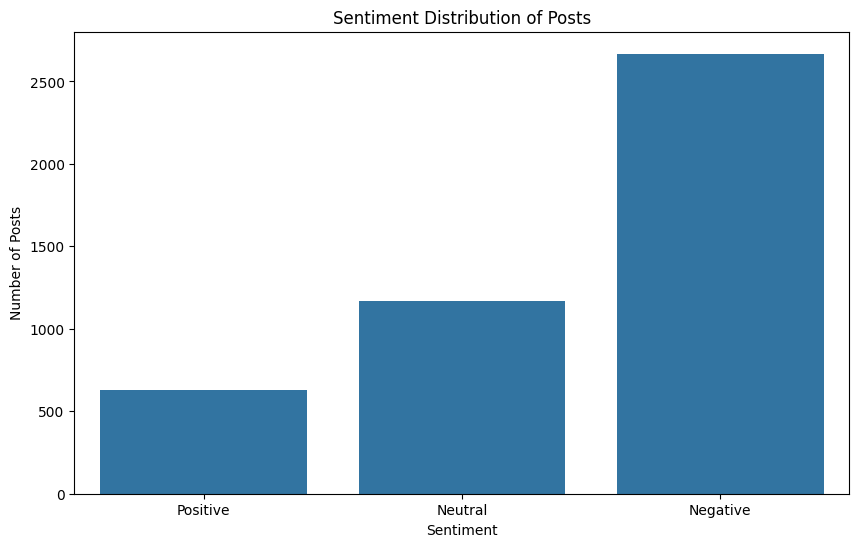

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation for demonstration (Replace this with your actual DataFrame)
# filtered_df = pd.read_csv('filtered_posts_with_vader_sentiment.csv')

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=contextually_filtered_df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'])

# Add titles and labels
plt.title('Sentiment Distribution of Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')

# Display the plot
plt.show()


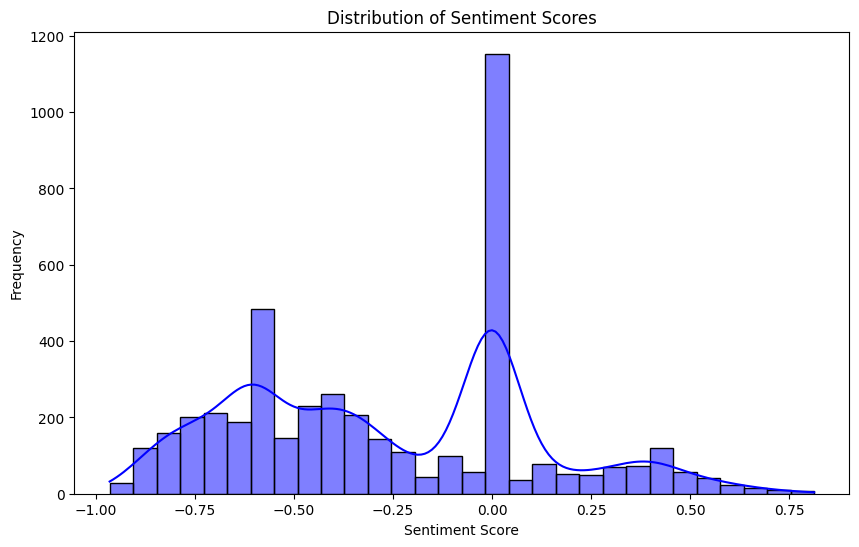

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation for demonstration (Replace this with your actual DataFrame)
# filtered_df = pd.read_csv('filtered_posts_with_vader_sentiment.csv')

# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(contextually_filtered_df['sentiment'], bins=30, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [ ]:
contextually_filtered_df

<ipython-input-87-a0fc096cea42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contextually_filtered_df['timestamp'] = pd.to_datetime(contextually_filtered_df['created_utc'], unit='s')


,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text,embedding,similarity,sentiment,sentiment_label,timestamp
timestamp,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.641077301,trolls_brigade,rtuqp9,1.641077e+09,83,europe,t5_2qh4j,Civilians flock to defend Ukraine as Russia te...,https://www.ft.com/content/09eedfc1-d111-40cb-...,17,83,NaN,2022-01-01 22:48:21,Civilians flock to defend Ukraine as Russia te...,"[0.06204668, 0.011701893, 0.22014187, 0.049561...",0.663754,-0.4019,Negative,2022-01-01 22:48:21
1970-01-01 00:00:01.641119701,RightwingIsTerror,ru7422,1.641120e+09,0,europe,t5_2qh4j,Russia calls for international investigation i...,https://notesfrompoland.com/2021/12/31/russia-...,11,0,NaN,2022-01-02 10:35:01,Russia calls for international investigation i...,"[-0.2367839, -0.22120154, 0.04924219, 0.011165...",0.686418,0.0000,Neutral,2022-01-02 10:35:01
1970-01-01 00:00:01.641165487,stillness0072,rumehv,1.641165e+09,129,europe,t5_2qh4j,China calls on Germany to not support Taiwan i...,https://www.aninews.in/news/world/europe/china...,146,129,NaN,2022-01-02 23:18:07,China calls on Germany to not support Taiwan i...,"[-0.122672185, 0.2229849, -0.016046045, 0.2196...",0.656433,-0.3089,Negative,2022-01-02 23:18:07
1970-01-01 00:00:01.641193368,pgarson,ruvmy6,1.641193e+09,57,europe,t5_2qh4j,Emily in Paris: Ukraine complains over Kyiv ch...,https://www.bbc.com/news/world-europe-59855440,123,57,NaN,2022-01-03 07:02:48,Emily in Paris: Ukraine complains over Kyiv ch...,"[-0.018543337, -0.15323612, 0.11839373, -0.049...",0.650369,-0.5994,Negative,2022-01-03 07:02:48
1970-01-01 00:00:01.641232091,inthelu2,rv7g2n,1.641232e+09,1,europe,t5_2qh4j,Joe Biden warns Vladimir Putin of 'heavy sanct...,https://www.sbs.com.au/news/joe-biden-warns-vl...,1,1,NaN,2022-01-03 17:48:11,Joe Biden warns Vladimir Putin of 'heavy sanct...,"[-0.03087259, 0.026206518, -0.02731935, -0.142...",0.659270,-0.1027,Negative,2022-01-03 17:48:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:01.703847127,Wagamaga,18tkhnt,1.703847e+09,53,europe,t5_2qh4j,"War in Ukraine: In 2023, Russian disinformatio...",https://observers.france24.com/en/war-in-ukrai...,1,53,NaN,2023-12-29 10:52:07,"War in Ukraine: In 2023, Russian disinformatio...","[0.07652656, -0.3433013, -0.032905195, 0.17618...",0.670040,-0.6597,Negative,2023-12-29 10:52:07
1970-01-01 00:00:01.703847440,UNITED24Media,18tkkdl,1.703847e+09,1,europe,t5_2qh4j,Kyiv in smoke from fires after massive Russian...,https://www.reddit.com/gallery/18tkkdl,0,1,NaN,2023-12-29 10:57:20,Kyiv in smoke from fires after massive Russian...,"[-0.30211526, -0.33557245, -0.0024284918, 0.03...",0.669262,-0.4767,Negative,2023-12-29 10:57:20
1970-01-01 00:00:01.703941263,Iknowwhatyoudoing,18uf5yv,1.703941e+09,1,europe,t5_2qh4j,Ukrainian attack on Russian city Belgorod 29th...,https://i.redd.it/pesfbcf7kf9c1.jpeg,3,1,[removed],2023-12-30 13:01:03,Ukrainian attack on Russian city Belgorod 29th...,"[-0.448682, -0.1543879, 0.14310966, -0.0540915...",0.663665,-0.4767,Negative,2023-12-30 13:01:03


In [ ]:
# Convert timestamp to datetime if it is not already
contextually_filtered_df['timestamp'] = pd.to_datetime(contextually_filtered_df['created_utc'], unit='s')

# Set timestamp as index
contextually_filtered_df.set_index('timestamp', inplace=True)

# Resample and aggregate sentiment scores by month
monthly_sentiment = contextually_filtered_df['sentiment'].resample('M').mean()

<ipython-input-51-1bff75f6cd8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contextually_filtered_df['timestamp'] = pd.to_datetime(contextually_filtered_df['created_utc'], unit='s')


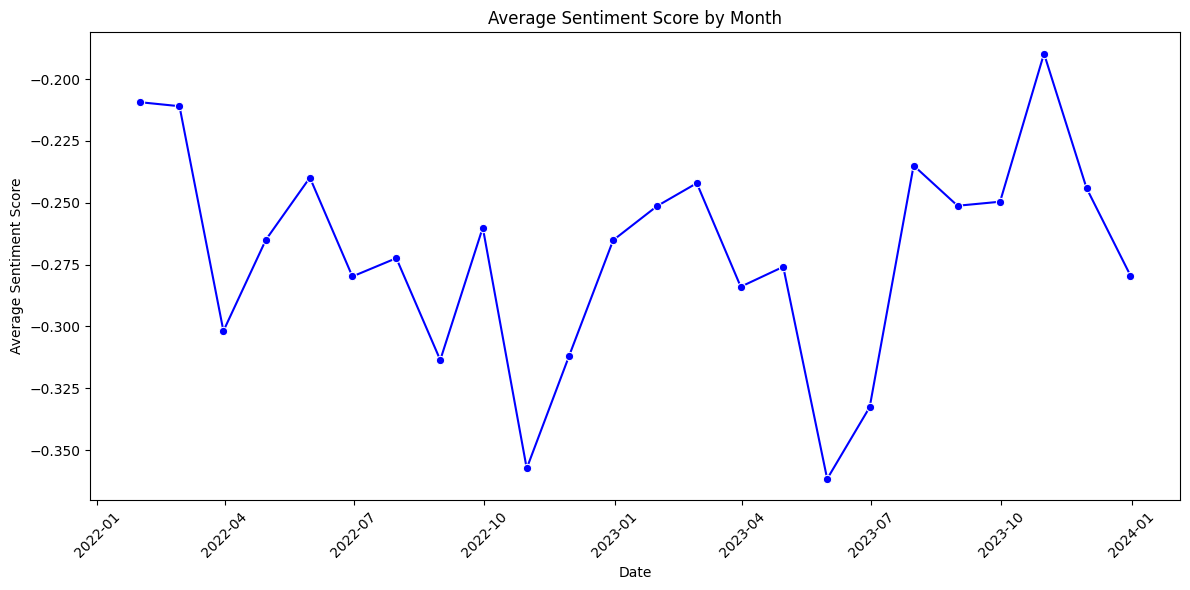

In [ ]:
# Resample and aggregate sentiment scores by month
monthly_sentiment = contextually_filtered_df['sentiment'].resample('M').mean()

# Plot sentiment changes over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sentiment, color='blue', marker='o')

# Add titles and labels
plt.title('Average Sentiment Score by Month')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

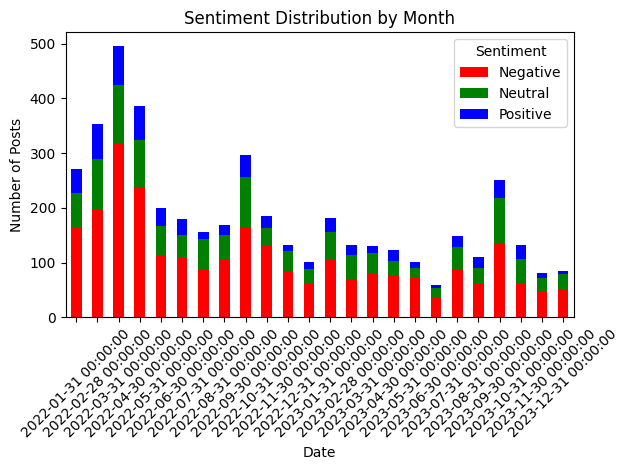

In [ ]:
monthly_sentiment_counts = contextually_filtered_df.resample('M')['sentiment_label'].value_counts().unstack().fillna(0)

# Plot sentiment changes over time
plt.figure(figsize=(14, 8))
monthly_sentiment_counts.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'])

# Add titles and labels
plt.title('Sentiment Distribution by Month')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

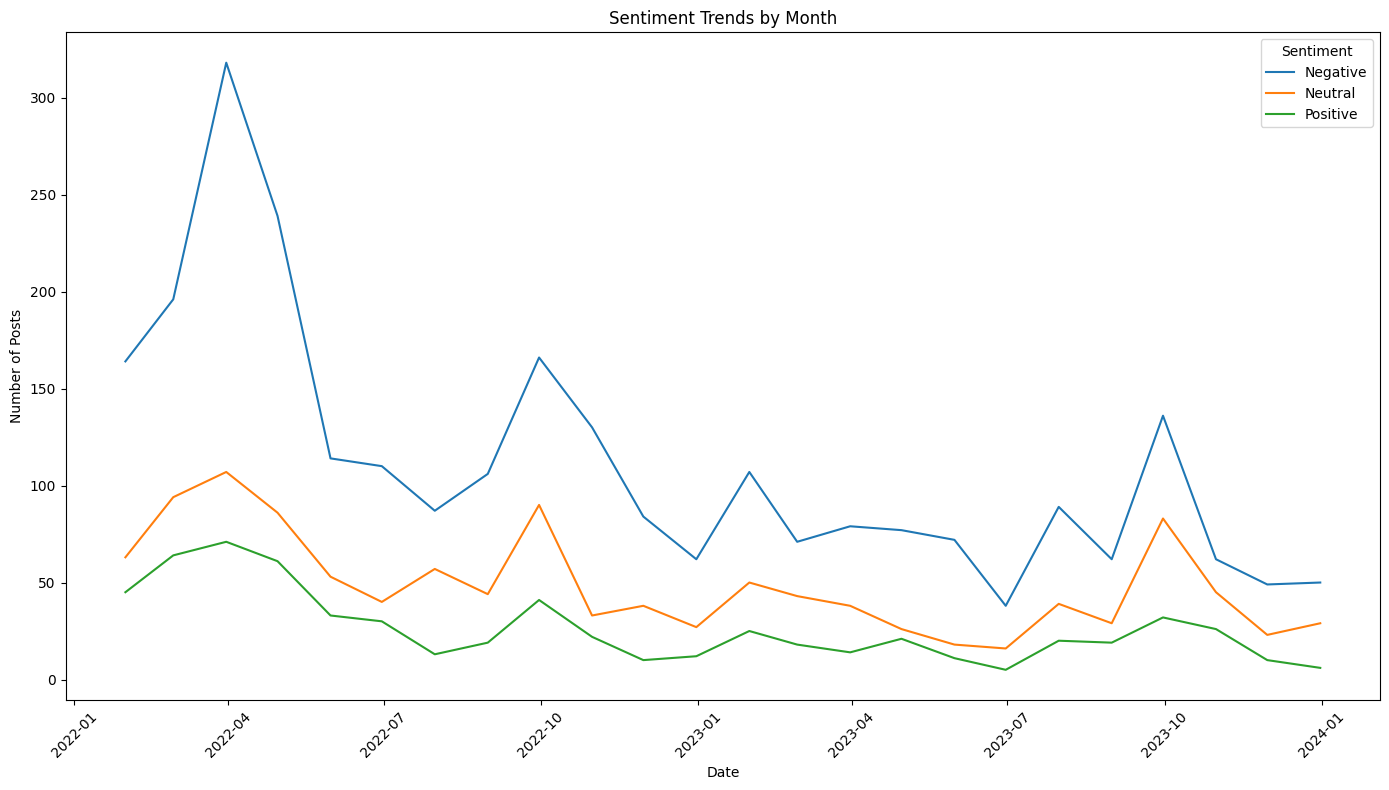

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment changes over time
plt.figure(figsize=(14, 8))

# Plot each sentiment trend
for sentiment in monthly_sentiment_counts.columns:
    plt.plot(monthly_sentiment_counts.index, monthly_sentiment_counts[sentiment], label=sentiment)

# Add titles and labels
plt.title('Sentiment Trends by Month')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from transformers import pipeline

# Initialize sentiment analysis pipeline with a transformer model

# Load a specific BERT-based sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


# Define the text
text = "Ukraine Needs Help Surviving Airstrikes, Not Just Killing Tanks"

# Get sentiment analysis results
results = sentiment_pipeline(text)
print(f"Sentiment Results: {results}")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentiment Results: [{'label': 'NEGATIVE', 'score': 0.9867624640464783}]


In [ ]:
import pandas as pd
from transformers import pipeline

# Load the pre-trained sentiment analysis model and tokenizer
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment",
                              tokenizer="cardiffnlp/twitter-roberta-base-sentiment", device=0)

# Define label mapping based on model labels
label_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

# Function to get sentiment for a single text
def analyze_sentiment(text):
    result = sentiment_pipeline(text)[0]
    # Map the label to descriptive sentiment
    sentiment_label = label_mapping.get(result['label'], 'Unknown')
    return sentiment_label, result['score']

# Function to process sentiment for the entire DataFrame
def process_sentiments(df):
    # Ensure no existing columns with the same names
    if 'sentiment_label' in df.columns:
        df = df.drop(columns=['sentiment_label'])
    if 'sentiment_score' in df.columns:
        df = df.drop(columns=['sentiment_score'])

    # Apply sentiment analysis
    sentiments = df['text'].apply(lambda text: pd.Series(analyze_sentiment(text)))

    # Rename columns to match expected output
    sentiments.columns = ['sentiment_label', 'sentiment_score']

    # Join the sentiment results back to the original DataFrame
    df = df.join(sentiments)
    return df

# Load your DataFrame (adjust the file path as necessary)
# For example, if the DataFrame is already loaded in variable `bert_df`, use that:
df = bert_df

# Apply sentiment analysis
df = process_sentiments(df)

# Print a sample of the DataFrame with sentiment results
df.head()

,author,id,created_utc,score,subreddit,subreddit_id,title,url,num_comments,score.1,selftext,timestamps,text,embedding,similarity,sentiment_label,sentiment_score
263,trolls_brigade,rtuqp9,1.641077e+09,83,europe,t5_2qh4j,Civilians flock to defend Ukraine as Russia te...,https://www.ft.com/content/09eedfc1-d111-40cb-...,17,83,NaN,2022-01-01 22:48:21,Civilians flock to defend Ukraine as Russia te...,"[0.0620466806, 0.0117018931, 0.220141873, 0.04...",0.663754,Neutral,0.656516
365,RightwingIsTerror,ru7422,1.641120e+09,0,europe,t5_2qh4j,Russia calls for international investigation i...,https://notesfrompoland.com/2021/12/31/russia-...,11,0,NaN,2022-01-02 10:35:01,Russia calls for international investigation i...,"[-0.236783907, -0.221201539, 0.049242191, 0.01...",0.686418,Neutral,0.656375
456,stillness0072,rumehv,1.641165e+09,129,europe,t5_2qh4j,China calls on Germany to not support Taiwan i...,https://www.aninews.in/news/world/europe/china...,146,129,NaN,2022-01-02 23:18:07,China calls on Germany to not support Taiwan i...,"[-0.122672185, 0.222984895, -0.0160460453, 0.2...",0.656433,Neutral,0.616249
473,pgarson,ruvmy6,1.641193e+09,57,europe,t5_2qh4j,Emily in Paris: Ukraine complains over Kyiv ch...,https://www.bbc.com/news/world-europe-59855440,123,57,NaN,2022-01-03 07:02:48,Emily in Paris: Ukraine complains over Kyiv ch...,"[-0.0185433365, -0.153236121, 0.118393727, -0....",0.650369,Negative,0.641993
549,inthelu2,rv7g2n,1.641232e+09,1,europe,t5_2qh4j,Joe Biden warns Vladimir Putin of 'heavy sanct...,https://www.sbs.com.au/news/joe-biden-warns-vl...,1,1,NaN,2022-01-03 17:48:11,Joe Biden warns Vladimir Putin of 'heavy sanct...,"[-0.0308725908, 0.0262065176, -0.0273193493, -...",0.659270,Neutral,0.575079


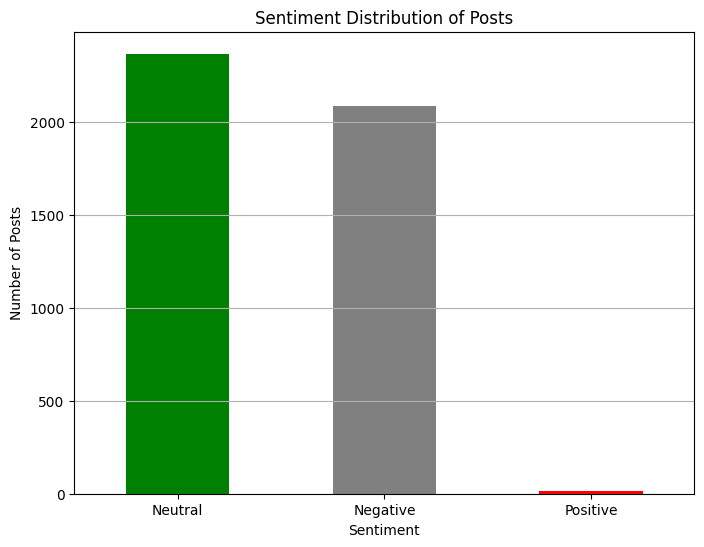

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.title('Sentiment Distribution of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
!pip install torch
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install bitsandbytes


In [ ]:
# Load model directly
import torch

from transformers import AutoTokenizer, AutoModelForCausalLM
model_name = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct")

# Load the model with 4-bit quantization
model = AutoModelForCausalLM.from_pretrained(model_name, load_in_4bit=True, device_map='auto', torch_dtype=torch.float16)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import pandas as pd


import os
import json


file_path = '/content/drive/My Drive/Dissertation/Europe/hk-eu-final.csv'
# Load the CSV files into DataFrames
covid_df = pd.read_csv(file_path)
covid_df


,author,id,created_utc,score,subreddit,subreddit_id,title,selftext,url,num_comments,combined_text,cleaned_text,classification
0,antico,6wfbi,1.218782e+09,9,europe,t5_2qh4j,UN criticises British government over recent l...,NaN,http://www.guardian.co.uk/politics/2008/aug/15...,0,UN criticises British government over recent l...,un criticises british government recent law im...,Neutral
1,ceprDC,dudup,1.287671e+09,0,europe,t5_2qh4j,The difference between rioting in baseball-pla...,NaN,http://www.cepr.net/index.php/op-eds-&amp;-col...,2,The difference between rioting in baseball-pla...,difference rioting baseballplaying versus socc...,Pro-Hong Kong Protest
2,alexandrustr,oq3su,1.327142e+09,4,europe,t5_2qh4j,"Protests in Romania, excessive use of force fr...",People are protesting because of the corruptio...,http://www.reddit.com/r/europe/comments/oq3su/...,0,"Protests in Romania, excessive use of force fr...",protest romania excessive use force police for...,Pro-Hong Kong Protest
3,ask0,zu010,1.347559e+09,8,europe,t5_2qh4j,What is r/Europe perspective on the general re...,I can understand the anger but I was surprised...,http://www.reddit.com/r/europe/comments/zu010/...,23,What is r/Europe perspective on the general re...,reurope perspective general reaction reddit re...,Neutral
4,cybertroll,10i608,1.348665e+09,9,europe,t5_2qh4j,Athens clashes as Greek police fire tear gas d...,NaN,http://www.bbc.co.uk/news/world-europe-19724284,4,Athens clashes as Greek police fire tear gas d...,athens clash greek police fire tear gas genera...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Rmmaar2020,176r75u,1.697174e+09,1,europe,t5_2qh4j,Freedom of speech doesn't only apply to the sp...,NaN,https://reddit-uploaded-media.s3-accelerate.am...,2,Freedom of speech doesn't only apply to the sp...,freedom speech doesnt apply speech want hear d...,Pro-Government (Anti-Hong Kong Protest)
451,Rmmaar2020,176r787,1.697174e+09,1,europe,t5_2qh4j,Freedom of speech doesn't only apply to the sp...,NaN,https://reddit-uploaded-media.s3-accelerate.am...,1,Freedom of speech doesn't only apply to the sp...,freedom speech doesnt apply speech want hear d...,Pro-Government (Anti-Hong Kong Protest)
452,Pansarskott,17ght1g,1.698275e+09,1,europe,t5_2qh4j,Freedom of speech*,NaN,https://i.redd.it/khwxievoifwb1.jpg,1,Freedom of speech*,freedom speech,Pro-Hong Kong Protest
453,Free_Swimming,17outki,1.699245e+09,1878,europe,t5_2qh4j,Turkish police shoot tear gas at pro Palestini...,NaN,https://www.timesofisrael.com/turkish-police-t...,192,Turkish police shoot tear gas at pro Palestini...,turkish police shoot tear gas pro palestinian ...,Neutral


In [ ]:
!pip install bertopic
!pip install sentence-transformers
!pip install umap-learn
!pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
titles = covid_df['cleaned_text'].tolist()
#topic_model = BERTopic.load('/content/drive/My Drive/Dissertation/London/london_subs_model')

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(titles)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

topic_model.get_topic_info().head(30).set_index('Topic')[
   ['Count', 'Name', 'Representation']]

,Count,Name,Representation
Topic,,,
-1,50,-1_gendarme_people_protest_gas,"[gendarme, people, protest, gas, tear, governm..."
0,130,0_speech_freedom_removed_europe,"[speech, freedom, removed, europe, european, g..."
1,77,1_hong_kong_china_chinese,"[hong, kong, china, chinese, prodemocracy, sec..."
2,54,2_tear_gas_migrant_turkish,"[tear, gas, migrant, turkish, greek, police, b..."
3,44,3_police_tear_gas_paris,"[police, tear, gas, paris, french, fire, prote..."
4,34,4_gas_tear_police_use,"[gas, tear, police, use, protest, protester, c..."
5,33,5_copyright_eu_people_vote,"[copyright, eu, people, vote, would, european,..."
6,20,6_kosovo_gas_tear_parliament,"[kosovo, gas, tear, parliament, serbia, opposi..."
7,13,7_belarus_election_lukashenko_result,"[belarus, election, lukashenko, result, prodem..."


In [ ]:
topic_model.visualize_barchart(top_n_topics = 12, n_words = 8)
